<a href="https://colab.research.google.com/github/syedayazsa/transfer-learning-for-segregation/blob/master/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOADING AND UNZIPPING THE DATA**

In [131]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZfxBTKpCueeUDFLGyL_qx4JR8RwREE00' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ZfxBTKpCueeUDFLGyL_qx4JR8RwREE00" -O vgg19.h5 && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1L3PEzvaeHC9_Q0lr7gNxDWEPOCibGOPX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1L3PEzvaeHC9_Q0lr7gNxDWEPOCibGOPX" -O vgg16.h5 && rm -rf /tmp/cookies.txt

--2020-05-19 19:38:05--  https://docs.google.com/uc?export=download&confirm=5ns0&id=1ZfxBTKpCueeUDFLGyL_qx4JR8RwREE00
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-9k-docs.googleusercontent.com/docs/securesc/gaino62kjcec71k60n4vmfrsp5csnnrp/u28ovj6lsoorhf1k9g9fib4s02umfvc0/1589917050000/14211000813324722452/10584400355621579407Z/1ZfxBTKpCueeUDFLGyL_qx4JR8RwREE00?e=download [following]
--2020-05-19 19:38:05--  https://doc-08-9k-docs.googleusercontent.com/docs/securesc/gaino62kjcec71k60n4vmfrsp5csnnrp/u28ovj6lsoorhf1k9g9fib4s02umfvc0/1589917050000/14211000813324722452/10584400355621579407Z/1ZfxBTKpCueeUDFLGyL_qx4JR8RwREE00?e=download
Resolving doc-08-9k-docs.googleusercontent.com (doc-08-9k-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting 

In [132]:
#importing dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM" -O data.zip && rm -rf /tmp/cookies.txt

--2020-05-19 19:38:26--  https://docs.google.com/uc?export=download&confirm=NeRM&id=1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM
Resolving docs.google.com (docs.google.com)... 74.125.195.100, 74.125.195.101, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-a8-docs.googleusercontent.com/docs/securesc/umlcm2p9moe32hq42ndo2qeci2mjbcer/ofioddkv05tblkkjjndsb3u7qm3doh8a/1589917050000/14211000813324722452/18385175159522849127Z/1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM?e=download [following]
--2020-05-19 19:38:26--  https://doc-14-a8-docs.googleusercontent.com/docs/securesc/umlcm2p9moe32hq42ndo2qeci2mjbcer/ofioddkv05tblkkjjndsb3u7qm3doh8a/1589917050000/14211000813324722452/18385175159522849127Z/1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM?e=download
Resolving doc-14-a8-docs.googleusercontent.com (doc-14-a8-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting 

In [0]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os, shutil, random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image
from tensorflow.keras.models import load_model

# **LOADING THE MODELS**

In [0]:
p1 = '/content/vgg16.h5'
p2 = '/content/vgg19.h5'

vgg16 = load_model(p1)
vgg19 = load_model(p2)

# **FUNCTIONS**

In [0]:
def preprocess_img(img):
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [0]:
def classify(img, model):
  pred = np.array(model.predict(img))
  c = int(np.argmax(pred))
  if c==0:
      c_img='automatic_rifles'
  elif c==1:
      c_img="band-aid"
  elif c==2:
      c_img="boots"
  elif c==3:
      c_img="bottles"
  elif c==4:
      c_img="bullet_shells"
  elif c==5:
      c_img="knives"
  elif c==6:
      c_img = "pistol_revolver"
  else:
      c_img = "syringes"

  return(c_img)

def confidence(img, model):
  pred = np.array(model.predict(img))
  loc = int(np.argmax(pred))
  return pred[0][loc]*100

# **PREDICT**

In [0]:
dataset_path = r'/content/split_dataset/validation'
folder_names = []
folder_names = [f for f in sorted(os.listdir(dataset_path))]
rand_folder_1 = random.choice(folder_names)
rand_folder_2 = random.choice(folder_names)
rand_folder_3 = random.choice(folder_names)
rand_folder_4 = random.choice(folder_names)

In [205]:
join_1 = os.path.join(dataset_path, rand_folder_1)
join_2 = os.path.join(dataset_path, rand_folder_2)
join_3 = os.path.join(dataset_path, rand_folder_3)
join_4 = os.path.join(dataset_path, rand_folder_4)

img_selected_1 = random.choice([x for x in os.listdir(join_1)
               if os.path.isfile(os.path.join(join_1, x))])
path_1 = os.path.join(join_1, img_selected_1)


img_selected_2 = random.choice([x for x in os.listdir(join_2)
               if os.path.isfile(os.path.join(join_2, x))])
path_2 = os.path.join(join_2, img_selected_2)


img_selected_3 = random.choice([x for x in os.listdir(join_3)
               if os.path.isfile(os.path.join(join_3, x))])
path_3 = os.path.join(join_3, img_selected_3)


img_selected_4 = random.choice([x for x in os.listdir(join_4)
               if os.path.isfile(os.path.join(join_4, x))])
path_4 = os.path.join(join_4, img_selected)



print(path_1)
print(path_2)
print(path_3)
print(path_4)

/content/split_dataset/validation/knives/img (981).jpg
/content/split_dataset/validation/bullet_shells/img (818).jpg
/content/split_dataset/validation/bullet_shells/img (912).jpg
/content/split_dataset/validation/bottles/img (848).jpg


In [0]:
img_size = (224, 224, 3)


im_vgg_1 = load_img(path_1, target_size=img_size)
im_vgg_2 = load_img(path_2, target_size=img_size)
im_vgg_3 = load_img(path_3, target_size=img_size)
im_vgg_4 = load_img(path_4, target_size=img_size)

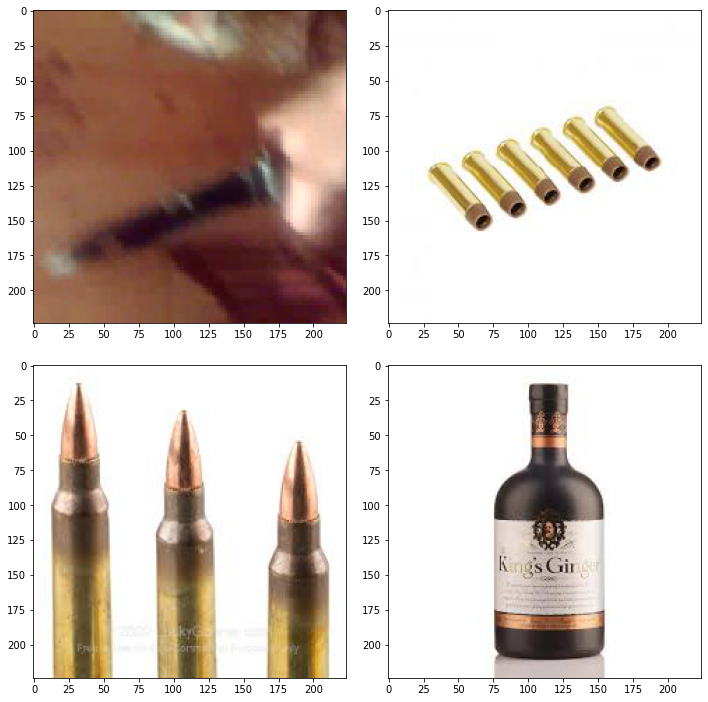

In [207]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.tight_layout()
ax[0][0].imshow(im_vgg_1)
ax[0][1].imshow(im_vgg_2)
ax[1][0].imshow(im_vgg_3)
ax[1][1].imshow(im_vgg_4)

In [0]:
t1 = preprocess_img(im_vgg_1)
t2 = preprocess_img(im_vgg_2)
t3 = preprocess_img(im_vgg_3)
t4 = preprocess_img(im_vgg_4)

c_vgg_161 = classify(t1, vgg16) + " (" + "Confidence: " + str(confidence(t1, vgg16)) +")"
c_vgg_162 = classify(t2, vgg16) + " (" + "Confidence: " + str(confidence(t2, vgg16)) +")"
c_vgg_163 = classify(t3, vgg16) + " (" + "Confidence: " + str(confidence(t3, vgg16)) +")"
c_vgg_164 = classify(t4, vgg16) + " (" + "Confidence: " + str(confidence(t4, vgg16)) +")"

c_vgg_191 = classify(t1, vgg19) + " (" + "Confidence: " + str(confidence(t1, vgg19)) +")"
c_vgg_192 = classify(t2, vgg19) + " (" + "Confidence: " + str(confidence(t2, vgg19)) +")"
c_vgg_193 = classify(t3, vgg19) + " (" + "Confidence: " + str(confidence(t3, vgg19)) +")"
c_vgg_194 = classify(t4, vgg19) + " (" + "Confidence: " + str(confidence(t4, vgg19)) +")"

Text(0.5, 1.0, 'VGG-19 bottles (Confidence: 100.0)')

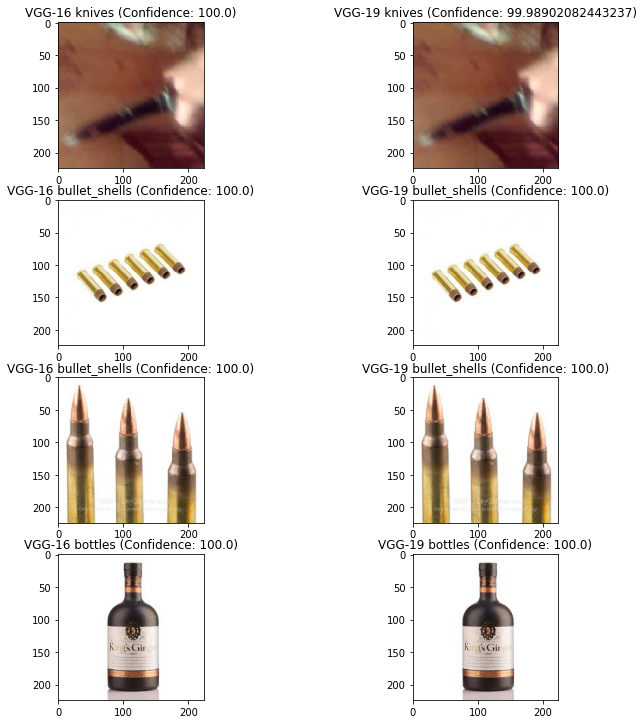

In [209]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (10,10))
fig.tight_layout()
ax[0][0].imshow(im_vgg_1)
ax[0][0].set_title("VGG-16 "+ c_vgg_161)
ax[0][1].imshow(im_vgg_1)
ax[0][1].set_title("VGG-19 " + c_vgg_191)

ax[1][0].imshow(im_vgg_2)
ax[1][0].set_title("VGG-16 " + c_vgg_162)
ax[1][1].imshow(im_vgg_2)
ax[1][1].set_title("VGG-19 " + c_vgg_192)

ax[2][0].imshow(im_vgg_3)
ax[2][0].set_title("VGG-16 " + c_vgg_163)
ax[2][1].imshow(im_vgg_3)
ax[2][1].set_title("VGG-19 " + c_vgg_193)

ax[3][0].imshow(im_vgg_4)
ax[3][0].set_title("VGG-16 " + c_vgg_164)
ax[3][1].imshow(im_vgg_4)
ax[3][1].set_title("VGG-19 " + c_vgg_194)

In [133]:
!unzip '/content/data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: split_dataset/train/bottles/img (665).jpg  
  inflating: split_dataset/train/bottles/img (666).jpg  
  inflating: split_dataset/train/bottles/img (667).jpg  
  inflating: split_dataset/train/bottles/img (668).jpg  
  inflating: split_dataset/train/bottles/img (669).jpg  
  inflating: split_dataset/train/bottles/img (67).jpg  
  inflating: split_dataset/train/bottles/img (670).jpg  
  inflating: split_dataset/train/bottles/img (671).jpg  
  inflating: split_dataset/train/bottles/img (672).jpg  
  inflating: split_dataset/train/bottles/img (673).jpg  
  inflating: split_dataset/train/bottles/img (674).jpg  
  inflating: split_dataset/train/bottles/img (675).jpg  
  inflating: split_dataset/train/bottles/img (676).jpg  
  inflating: split_dataset/train/bottles/img (677).jpg  
  inflating: split_dataset/train/bottles/img (678).jpg  
  inflating: split_dataset/train/bottles/img (679).jpg  
  inflating: split_dataset/train/bottl